In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
columns = ['Age', 'Work Class', 'Final Weight', 'Education', 'Education Number', 'Marital Status', 'Occupation',
          'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per Week', 'Country', 'Income']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/adult.csv', names = columns)

In [ ]:
df.head()

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32562, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32562 non-null  object
 1   Work Class        32562 non-null  object
 2   Final Weight      32562 non-null  object
 3   Education         32562 non-null  object
 4   Education Number  32562 non-null  object
 5   Marital Status    32562 non-null  object
 6   Occupation        32562 non-null  object
 7   Relationship      32562 non-null  object
 8   Race              32562 non-null  object
 9   Sex               32562 non-null  object
 10  Capital Gain      32562 non-null  object
 11  Capital Loss      32562 non-null  object
 12  Hours per Week    32562 non-null  object
 13  Country           32562 non-null  object
 14  Income            32562 non-null  object
dtypes: object(15)
memory usage: 3.7+ MB


In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Final Weight'] = pd.to_numeric(df['Final Weight'], errors='coerce')
df['Education Number'] = pd.to_numeric(df['Education Number'], errors='coerce')
df['Capital Gain'] = pd.to_numeric(df['Capital Gain'], errors='coerce')
df['Capital Loss'] = pd.to_numeric(df['Capital Loss'], errors='coerce')
df['Hours per Week'] = pd.to_numeric(df['Hours per Week'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               32561 non-null  float64 
 1   Work Class        32562 non-null  object  
 2   Final Weight      32561 non-null  float64 
 3   Education         32562 non-null  object  
 4   Education Number  32561 non-null  float64 
 5   Marital Status    32562 non-null  object  
 6   Occupation        32562 non-null  object  
 7   Relationship      32562 non-null  object  
 8   Race              32562 non-null  object  
 9   Sex               32562 non-null  object  
 10  Capital Gain      32561 non-null  float64 
 11  Capital Loss      32561 non-null  float64 
 12  Hours per Week    32561 non-null  float64 
 13  Country           32562 non-null  object  
 14  Income            32562 non-null  category
dtypes: category(1), float64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
df['Income'] = labelEncoder.fit_transform(dataset['Income'])

In [ ]:
df.head()

,Age,Work Class,Final Weight,Education,Education Number,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Country,Income
0,NaN,workclass,NaN,education,NaN,marital.status,occupation,relationship,race,sex,NaN,NaN,NaN,native.country,2
1,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0
2,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18.0,United-States,0
3,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0
4,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Final Weight'}>],
       [<Axes: title={'center': 'Education Number'}>,
        <Axes: title={'center': 'Capital Gain'}>],
       [<Axes: title={'center': 'Capital Loss'}>,
        <Axes: title={'center': 'Hours per Week'}>]], dtype=object)

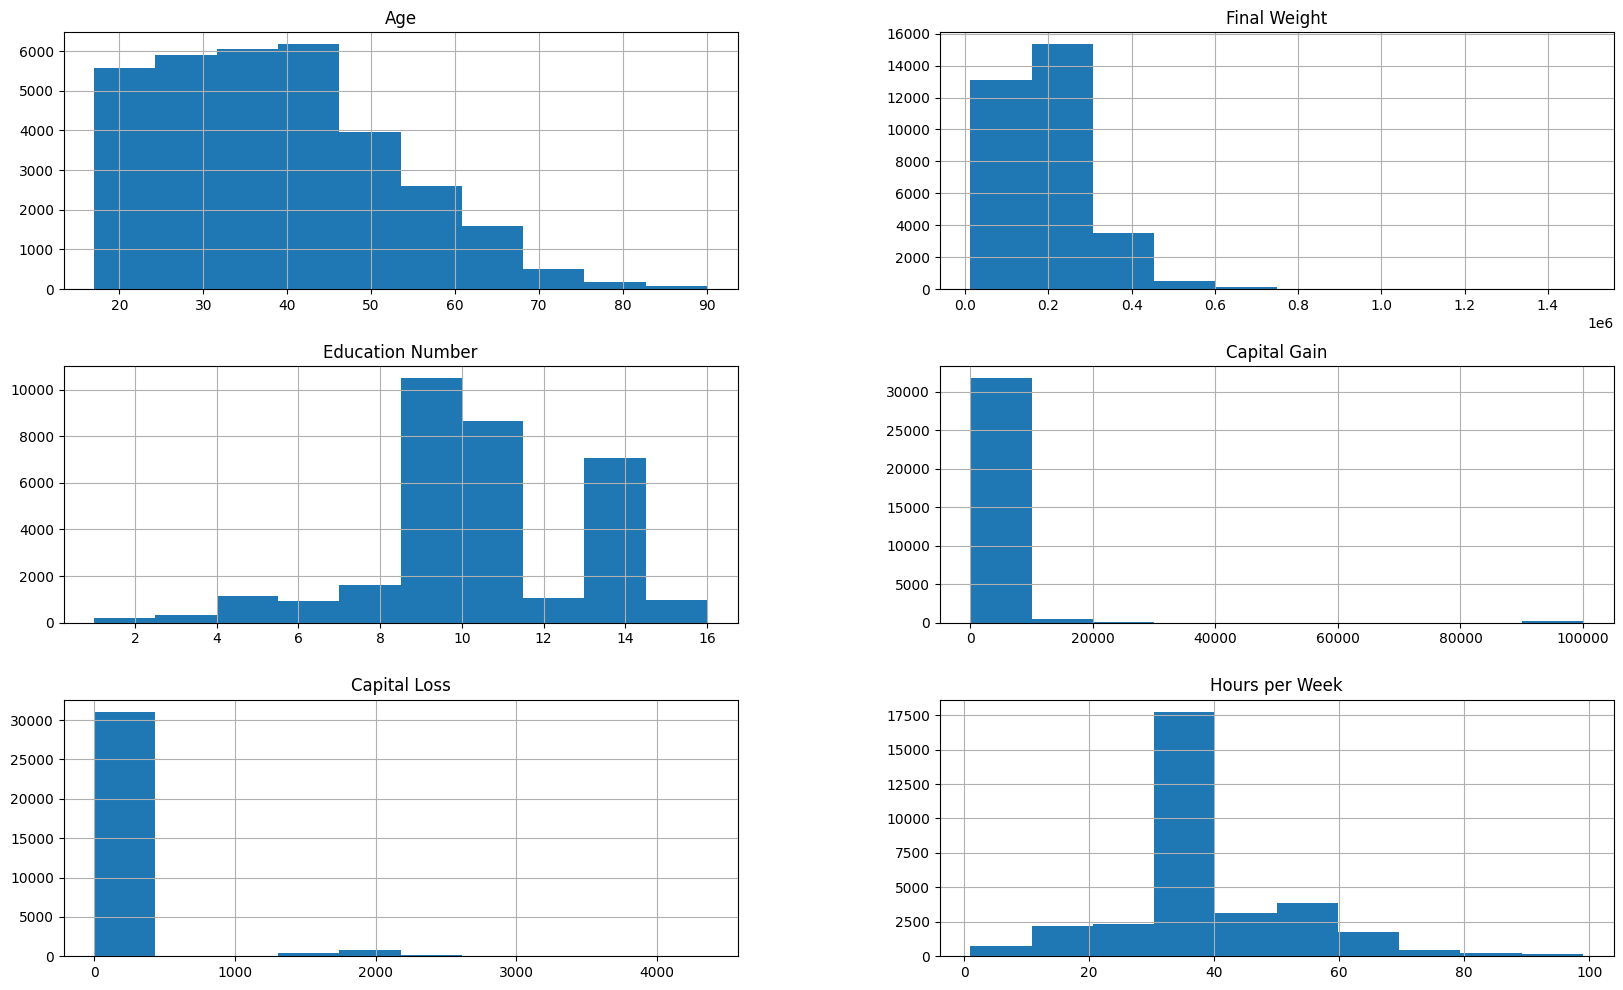

In [ ]:
df[['Age', 'Final Weight', 'Education Number', 'Capital Gain', 'Capital Loss', 'Hours per Week']].hist()

In [ ]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<Axes: xlabel='Age', ylabel='count'>

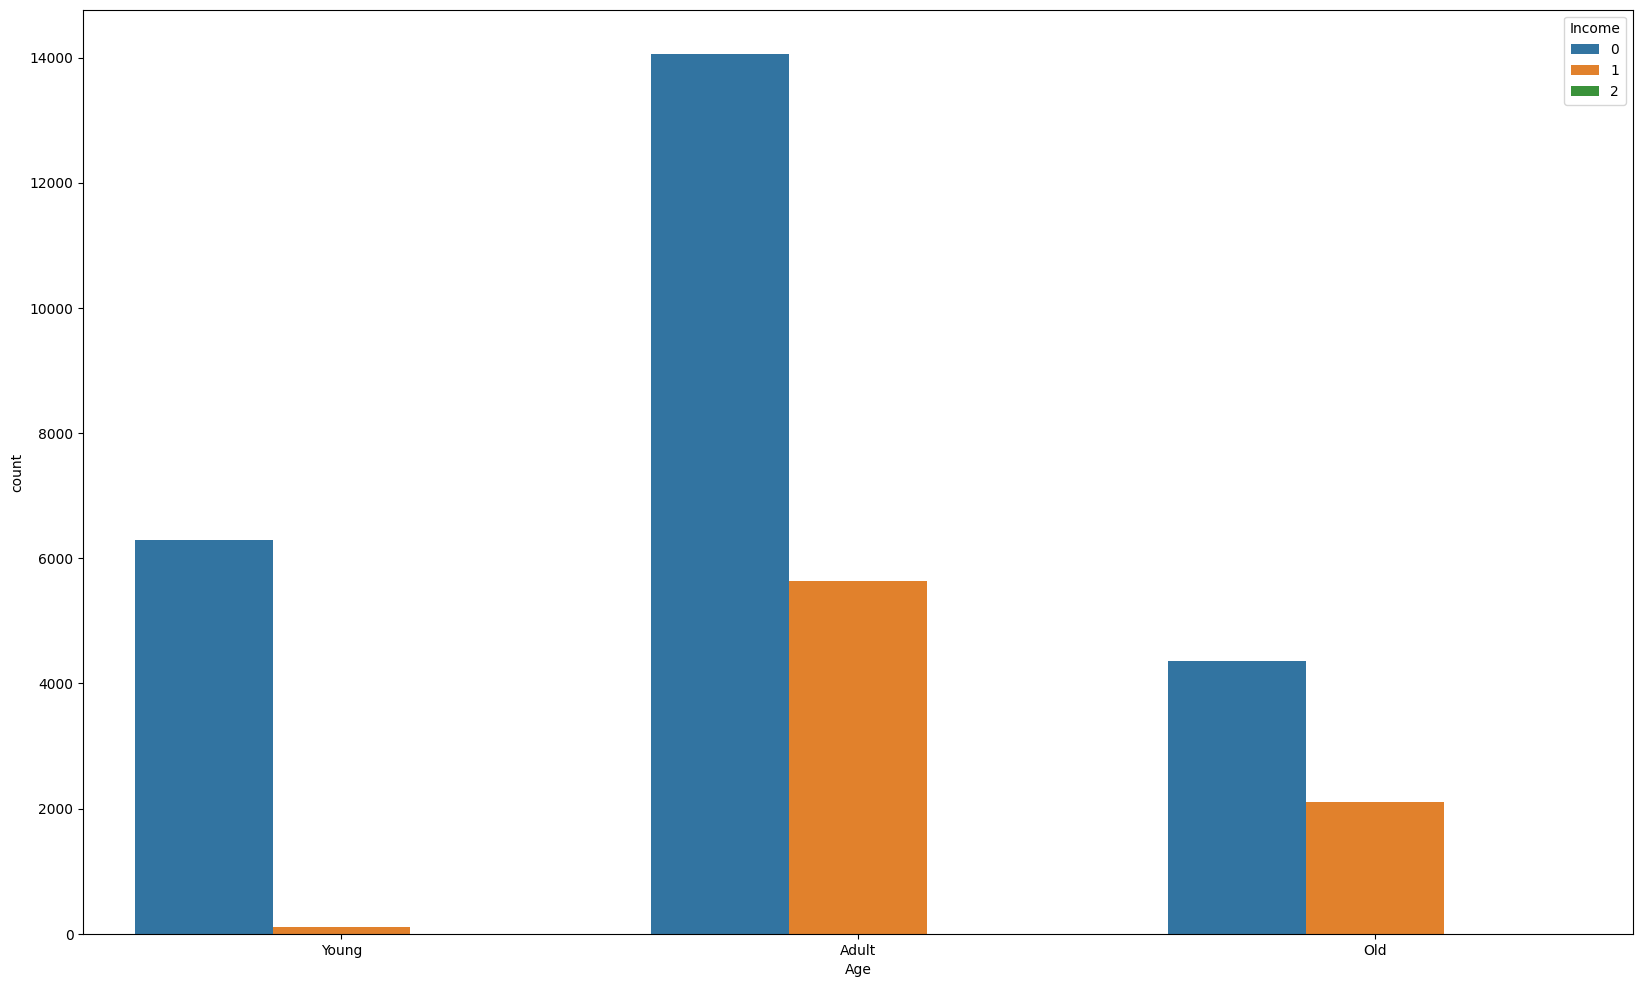

In [ ]:
sns.countplot(x = 'Age', hue = 'Income', data = df)

In [ ]:
df['Capital Diff'] = df['Capital Gain'] - df['Capital Loss']
df.drop(['Capital Gain'], axis = 1, inplace = True)
df.drop(['Capital Loss'], axis = 1, inplace = True)

<Axes: xlabel='Capital Diff', ylabel='count'>

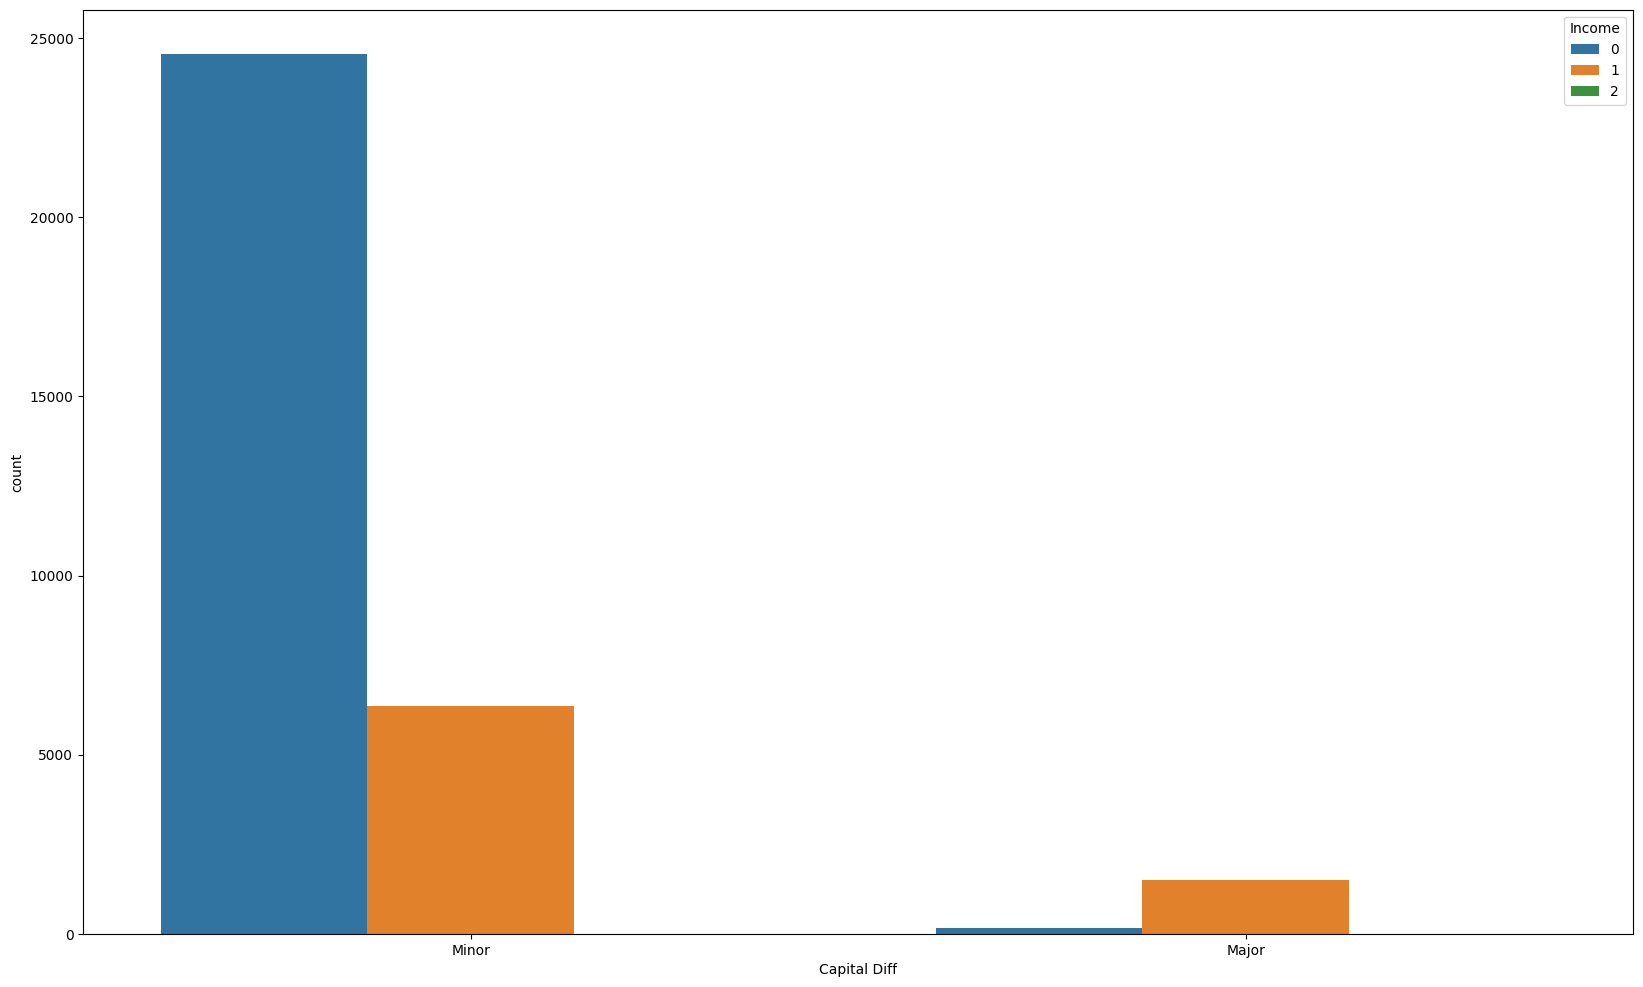

In [ ]:
df['Capital Diff'] = pd.cut(df['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Capital Diff', hue = 'Income', data = df)

In [ ]:
dataset.drop(['Final Weight'], axis = 1, inplace = True)

In [ ]:
df['Hours per Week'] = pd.cut(df['Hours per Week'],
                                   bins = [0, 30, 40, 100],
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<Axes: xlabel='Hours per Week', ylabel='count'>

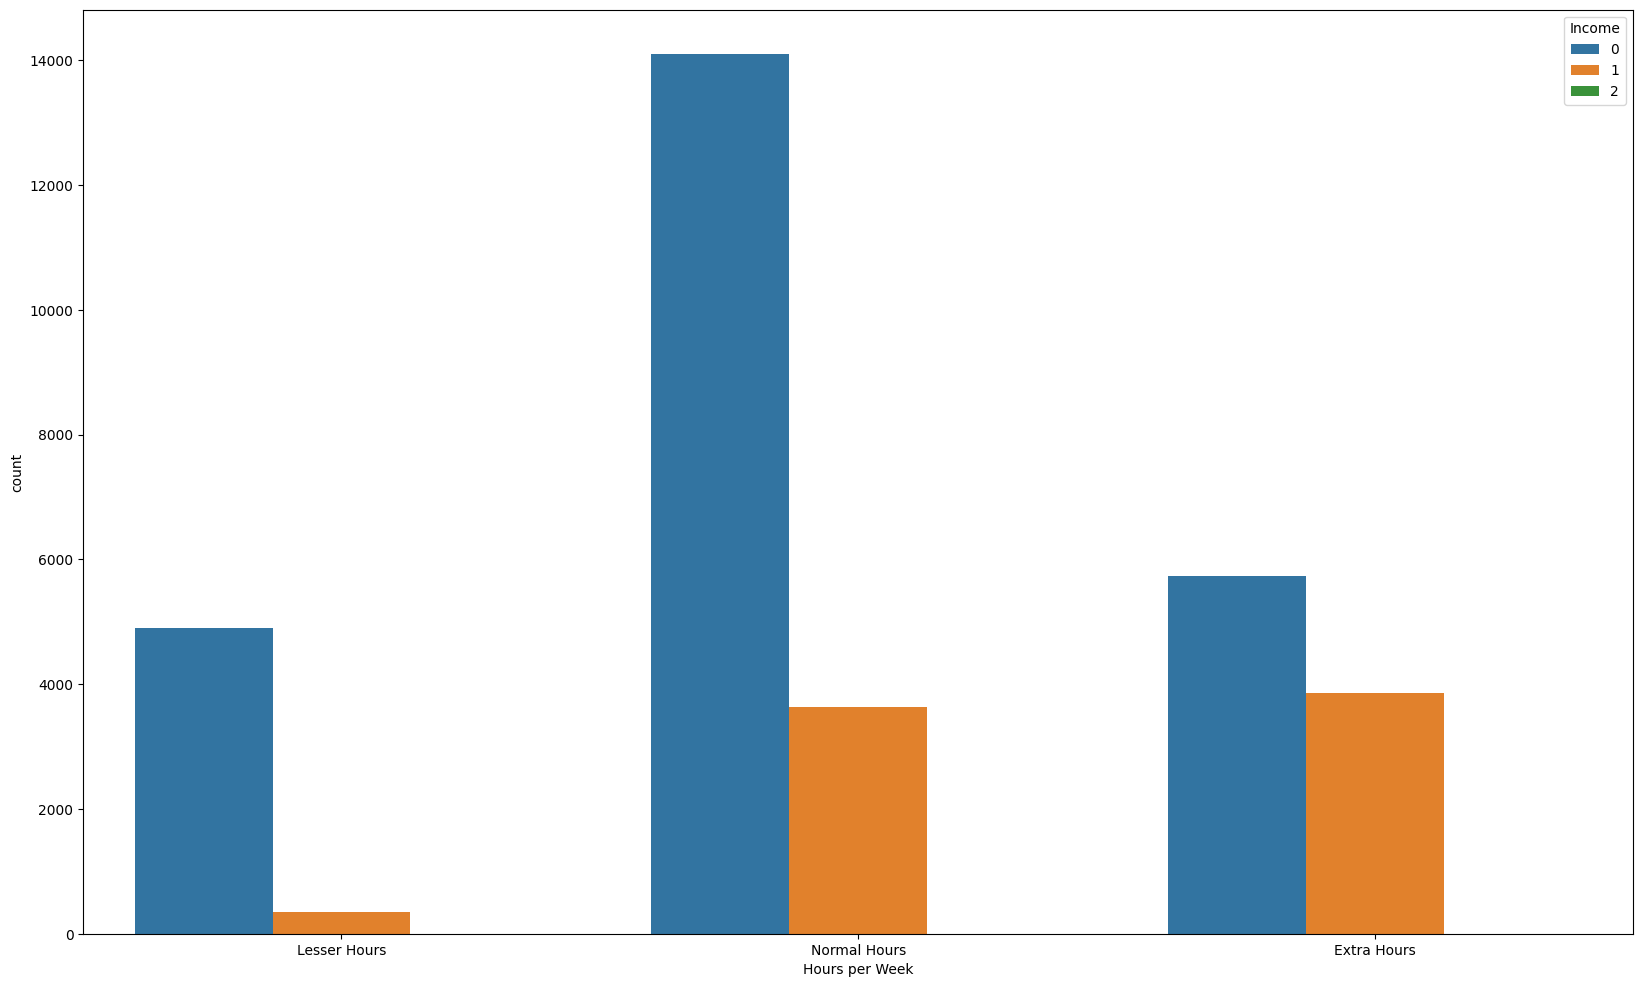

In [ ]:
sns.countplot(x = 'Hours per Week', hue = 'Income', data = df)

<Axes: xlabel='Work Class', ylabel='count'>

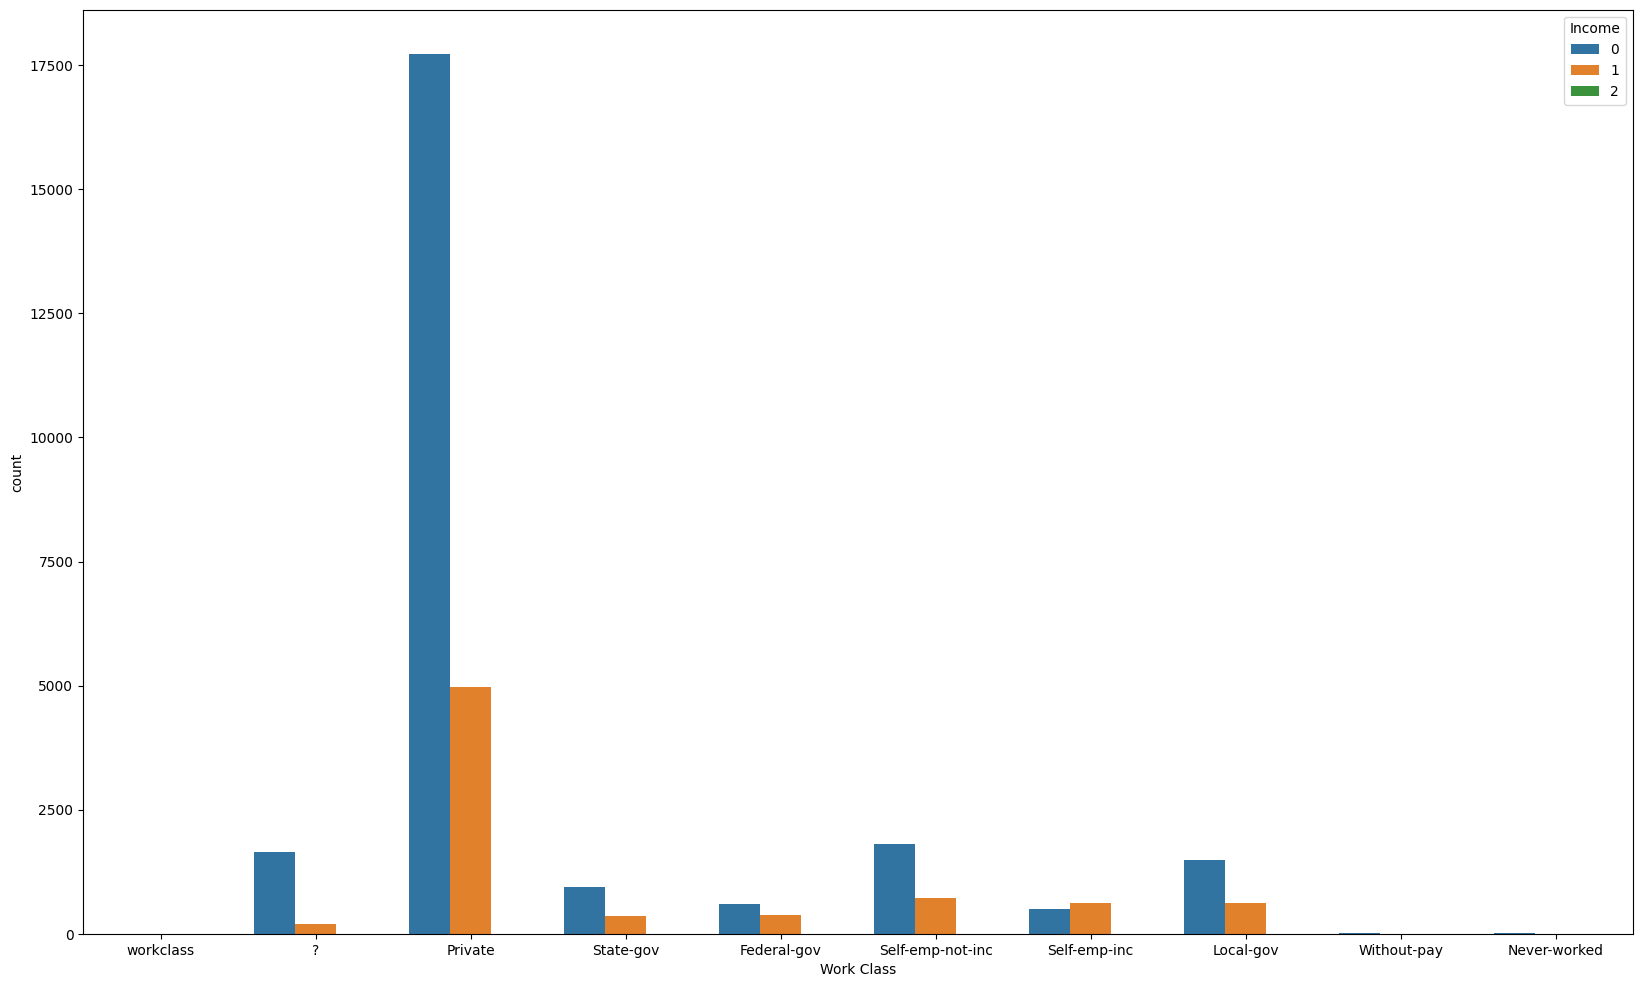

In [ ]:
sns.countplot(x = 'Work Class', hue = 'Income', data = df)

In [ ]:
df = df.drop(dataset[df['Work Class'] == ' ?'].index)
df = df.drop(dataset[df['Work Class'] == ' Without-pay'].index)
df = df.drop(dataset[df['Work Class'] == ' Never-worked'].index)

<Axes: xlabel='Education', ylabel='count'>

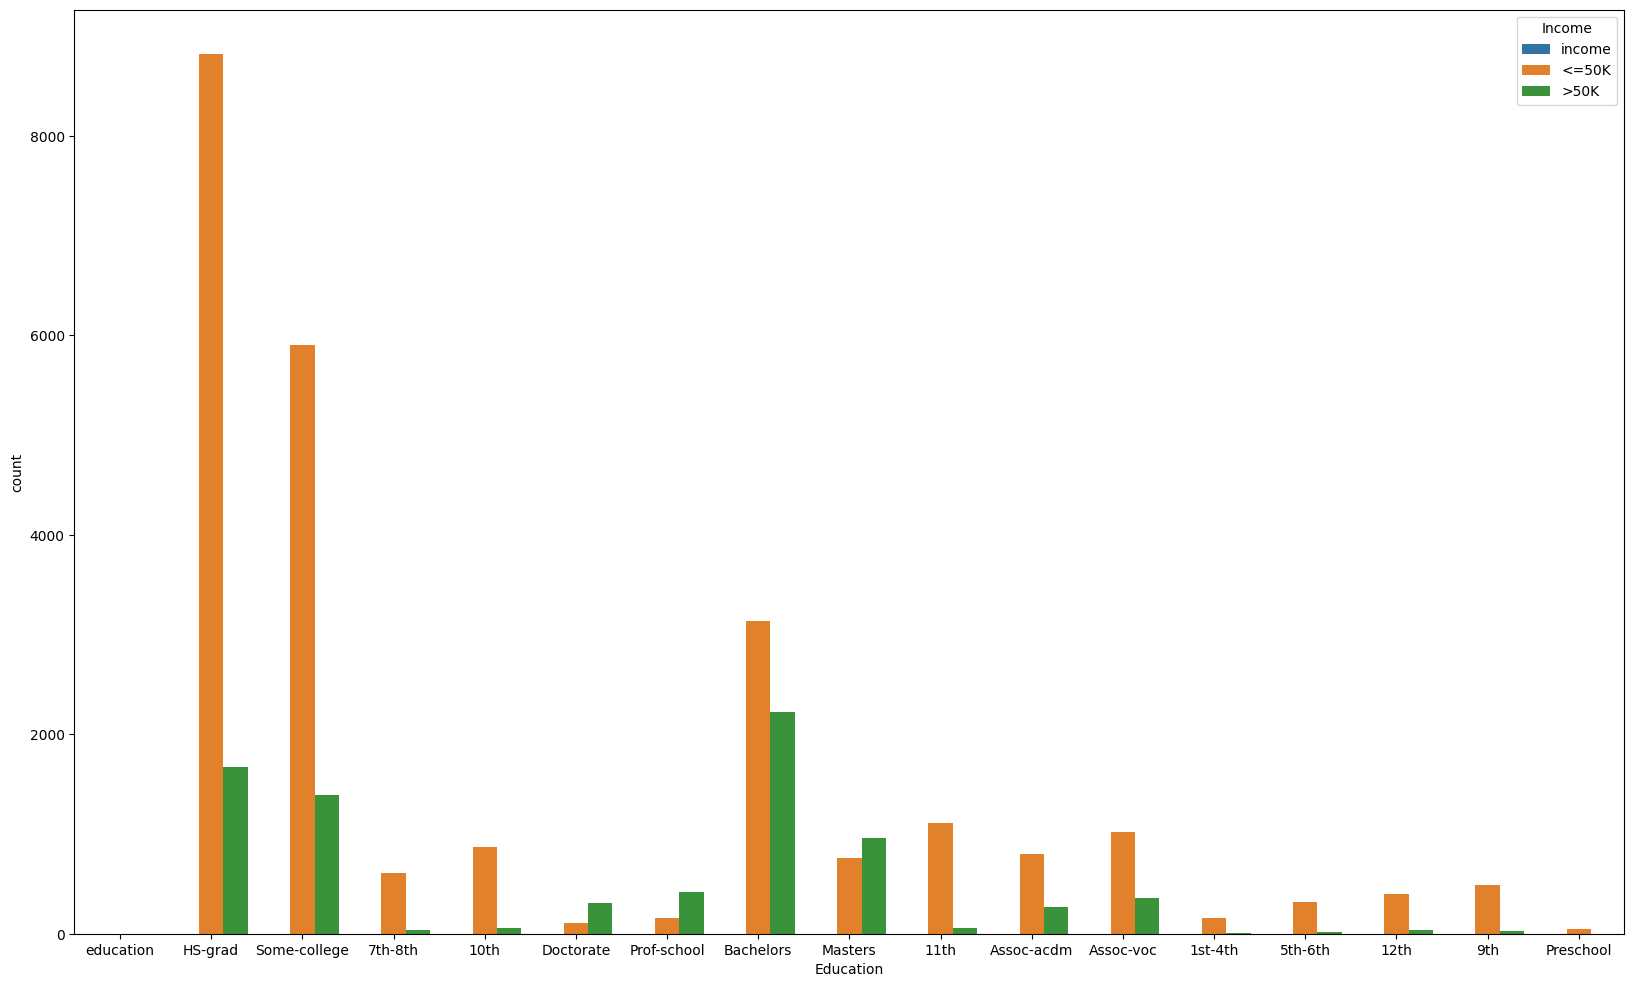

In [ ]:
sns.countplot(x = 'Education', hue = 'Income', data = dataset)

In [ ]:
df.drop(['Education Number'], axis = 1, inplace = True)
df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['Education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
education           1
Name: Education, dtype: int64

In [ ]:
dataset['Marital Status'].value_counts()


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
marital.status               1
Name: Marital Status, dtype: int64

In [ ]:
dataset['Relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
relationship          1
Name: Relationship, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

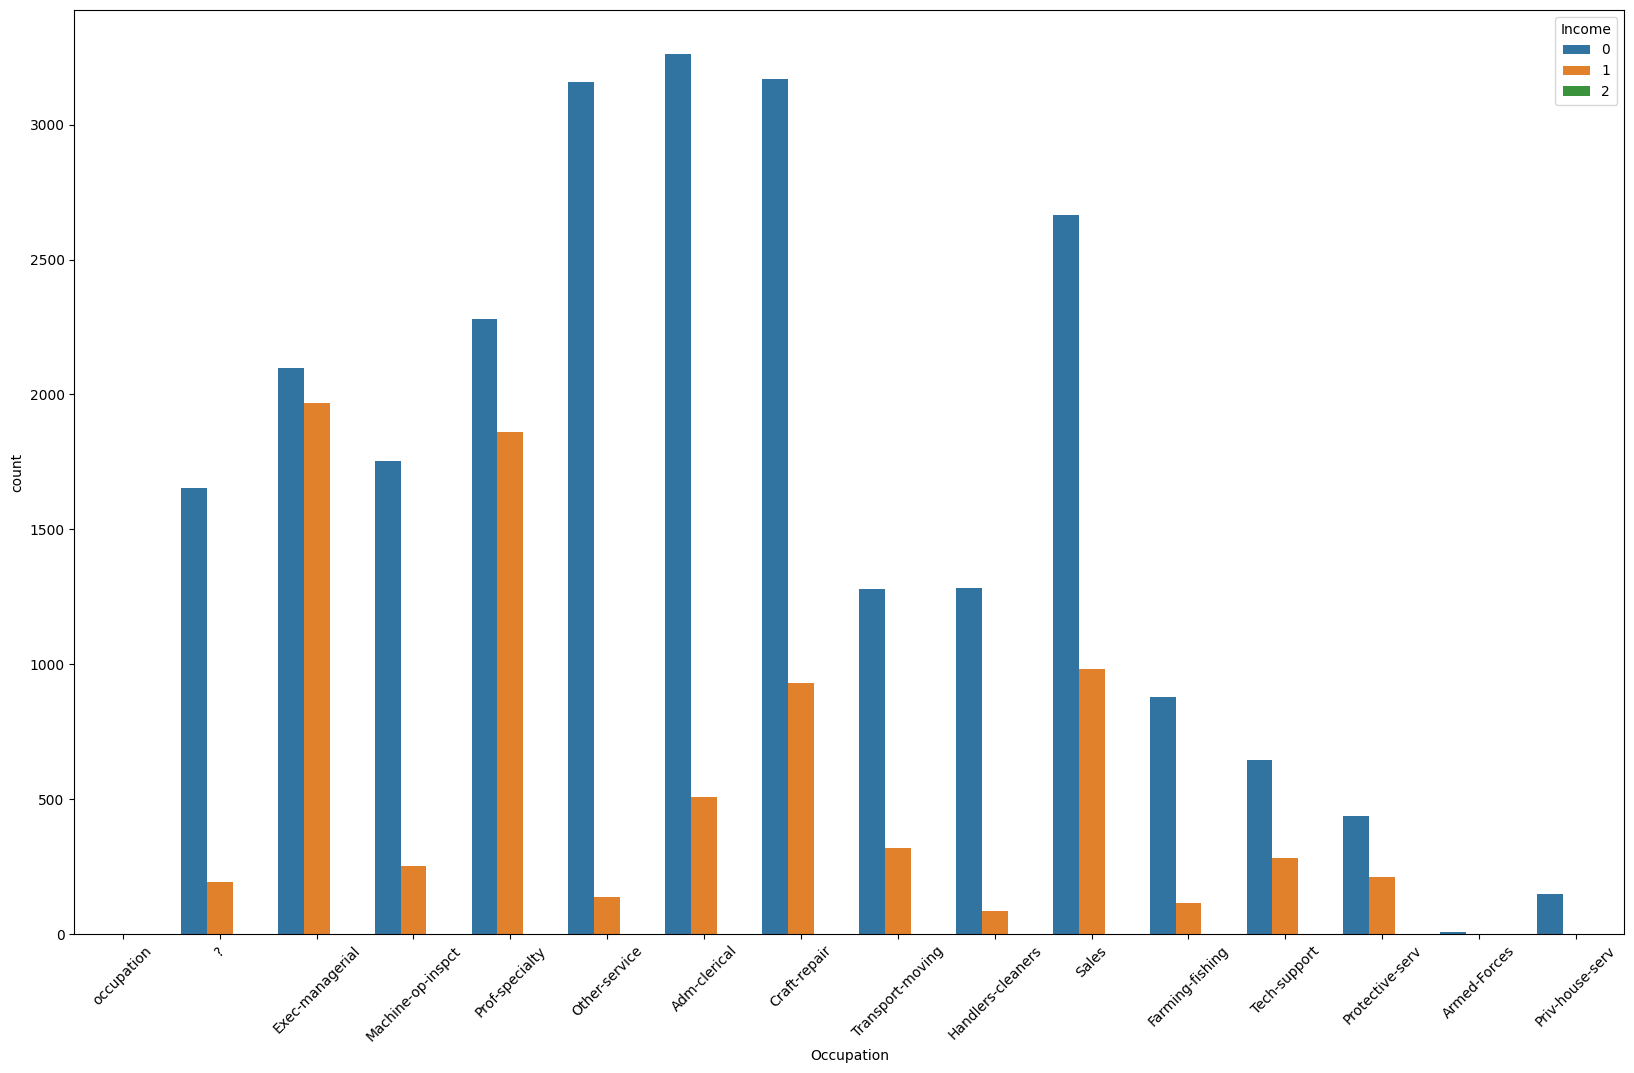

In [ ]:
plt.xticks(rotation = 45)
sns.countplot(x = 'Occupation', hue = 'Income', data = df)

<Axes: xlabel='Race', ylabel='count'>

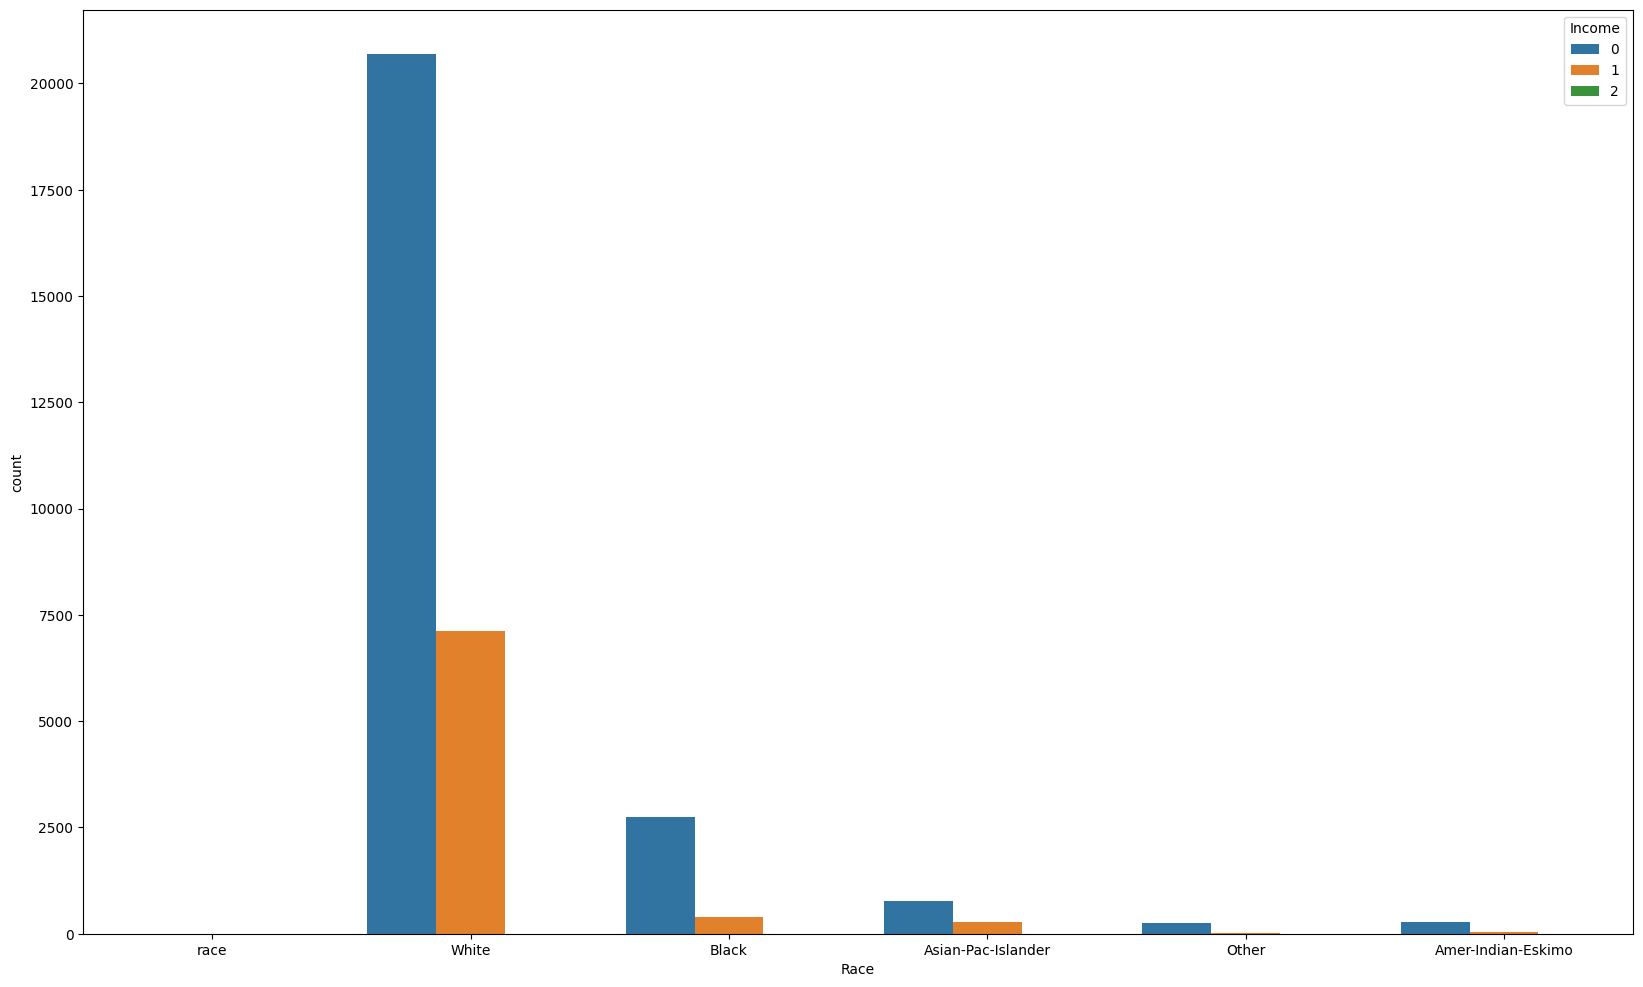

In [ ]:
sns.countplot(x = 'Race', hue = 'Income', data = df)

In [ ]:
df['Race'].unique()
df['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

<Axes: xlabel='Sex', ylabel='count'>

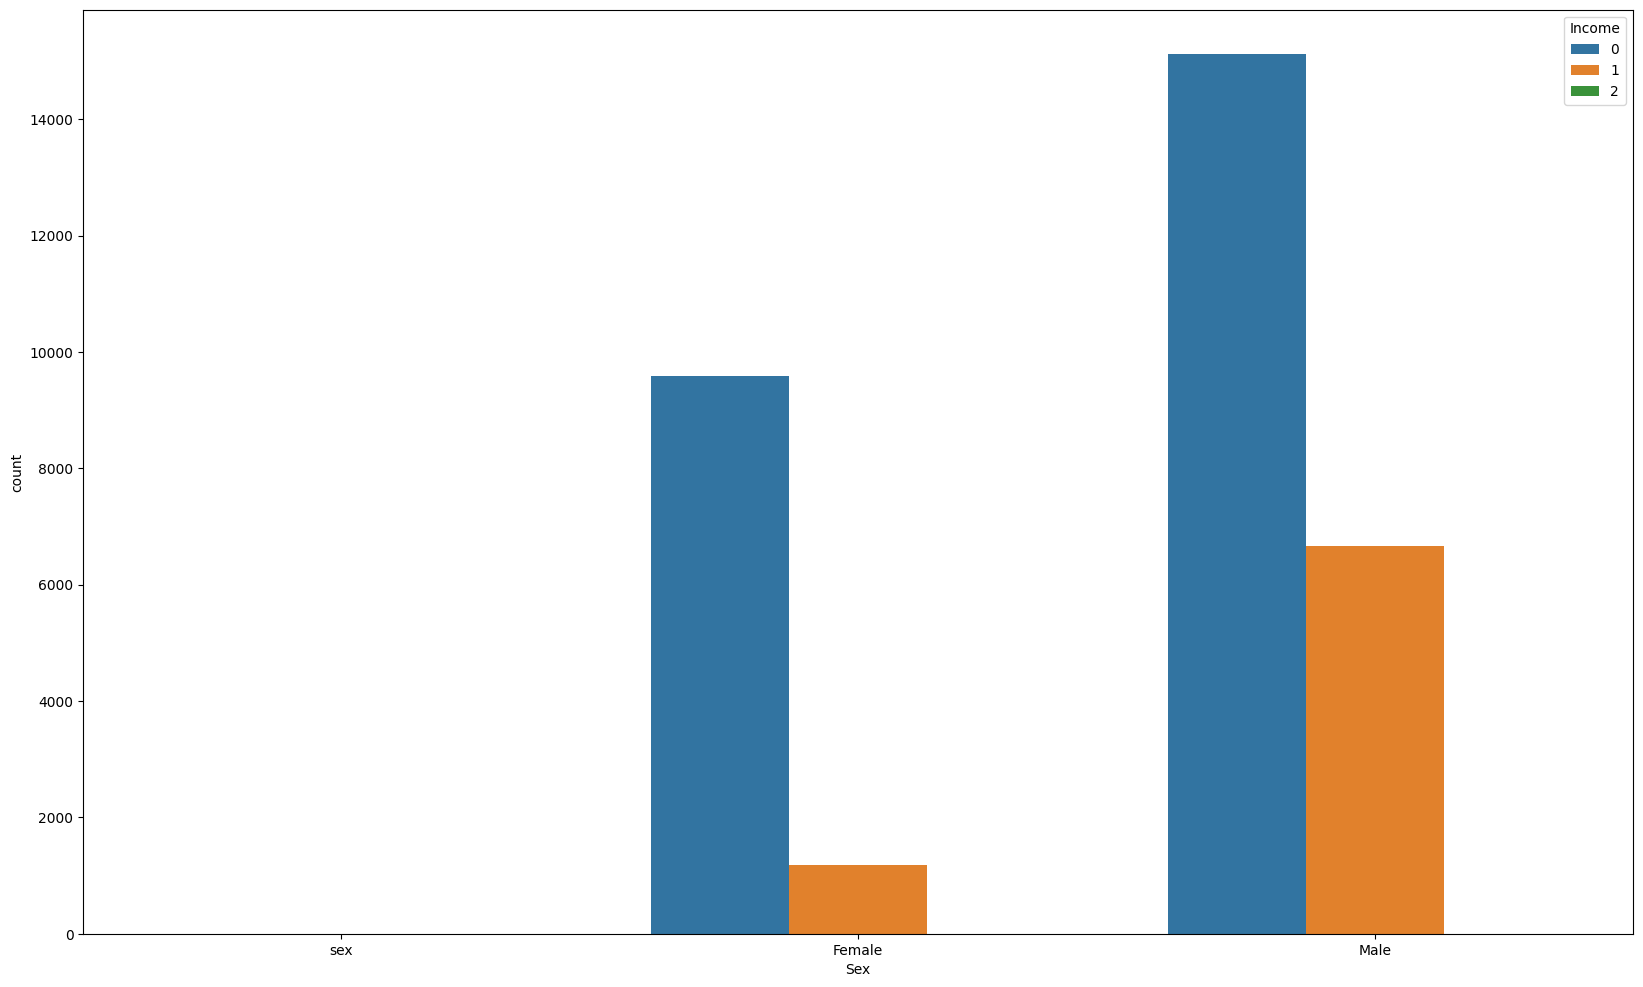

In [ ]:
sns.countplot(x = 'Sex', hue = 'Income', data = df)


In [ ]:
country_count = df['Country'].value_counts()
country_count


United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Text(0.5, 1.0, 'Total adults from each Country')

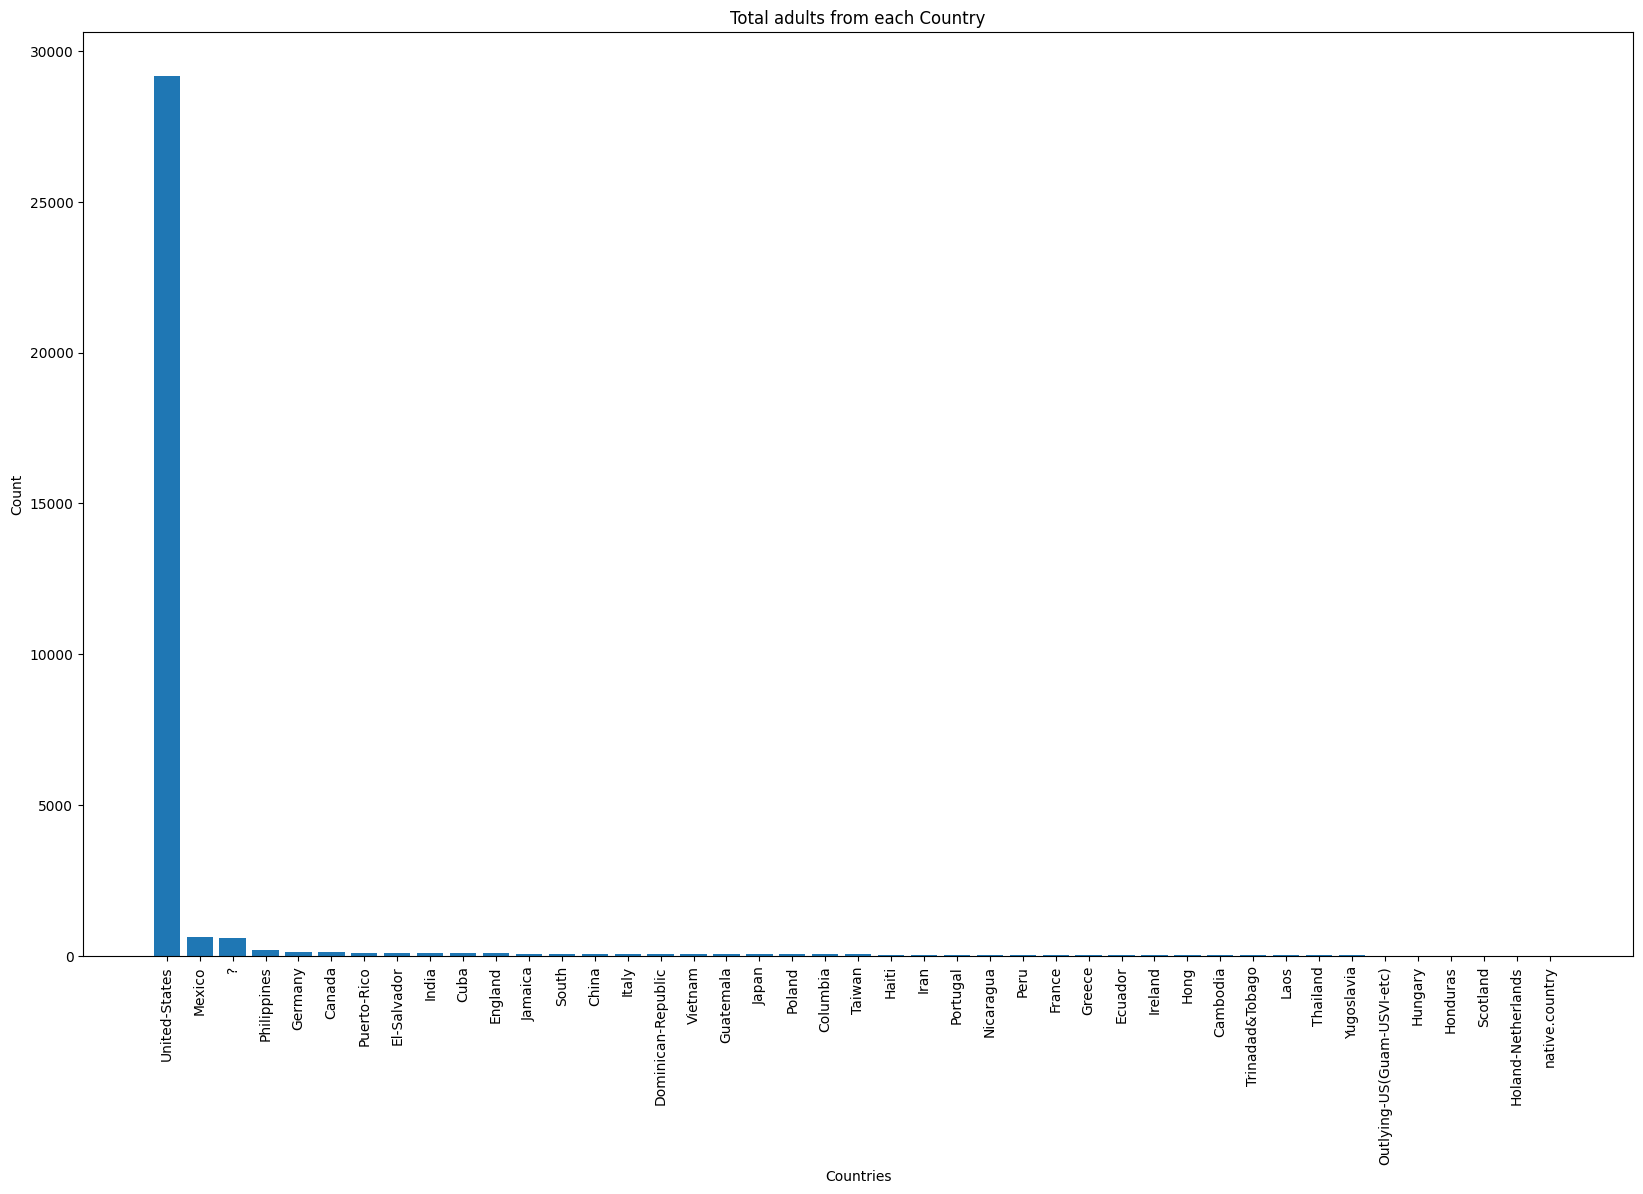

In [ ]:
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

In [ ]:
df = df.drop(df[df['Country'] == ' ?'].index)

In [ ]:
countries = np.array(dataset['Country'].unique())
countries = np.delete(countries, 0)

In [ ]:
dataset['Country'].replace(countries, 'Other', inplace = True)

<Axes: xlabel='count', ylabel='Country'>

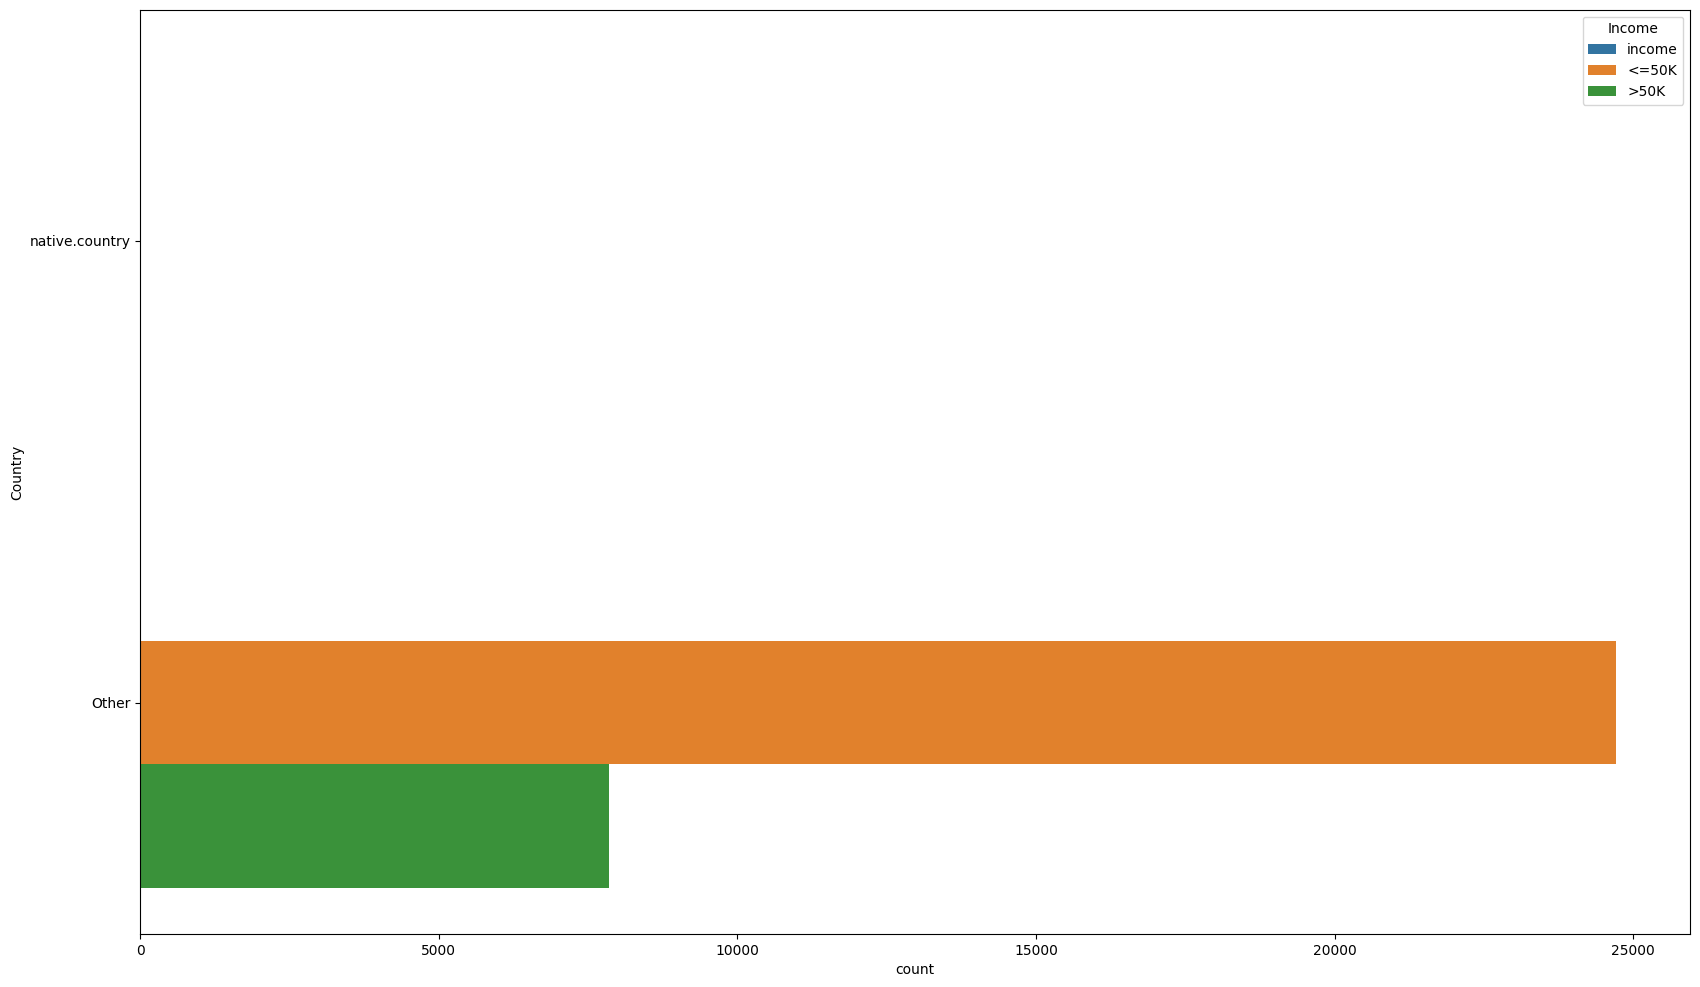

In [ ]:
sns.countplot(y = 'Country', hue = 'Income', data = dataset)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier